## Анализ данных авиакомпании "F9': предпочтение пользователей.
 Понять предпочтения пользователей, покупающих билеты на те или иные направления.
 Задача: изучить педпочтения пользователей на выделенном датасете.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime as dt
from math import *

### 1. Изучение данных 

In [2]:
data_aircrafts = pd.read_csv('/datasets/query_1.csv')

In [3]:
data_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
display(data_aircrafts)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
data_flights = pd.read_csv('/datasets/query_3.csv')

In [6]:
data_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
display(data_flights)
data_flights.describe()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


### 2. Предобработка данных

In [8]:
data_flights.duplicated().sum()

0

### 3. Работа с данными

In [9]:
data_flights.sort_values(by = 'average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Самыми популярными городами в России для авиаперелетов являются Москва и Санкт-Петербург. Что вполне логично: это не только две столицы страны, но и основные пересадочные пункты для авиаперелетов за рубеж. 

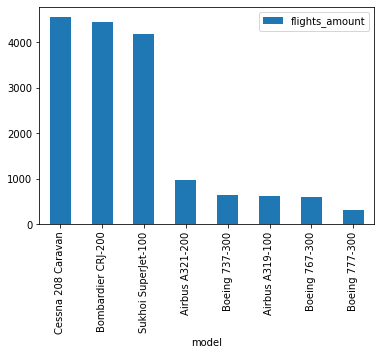

In [10]:
data_aircrafts.sort_values(by = 'flights_amount', ascending= False).plot(y = 'flights_amount', x = 'model', kind = 'bar')

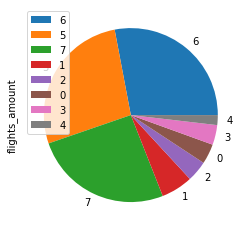

In [11]:
data_aircrafts.sort_values(by = 'flights_amount', ascending= False).plot(y = 'flights_amount', kind = 'pie')

Больше всего рейсов делают самолеты, моделей Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100.

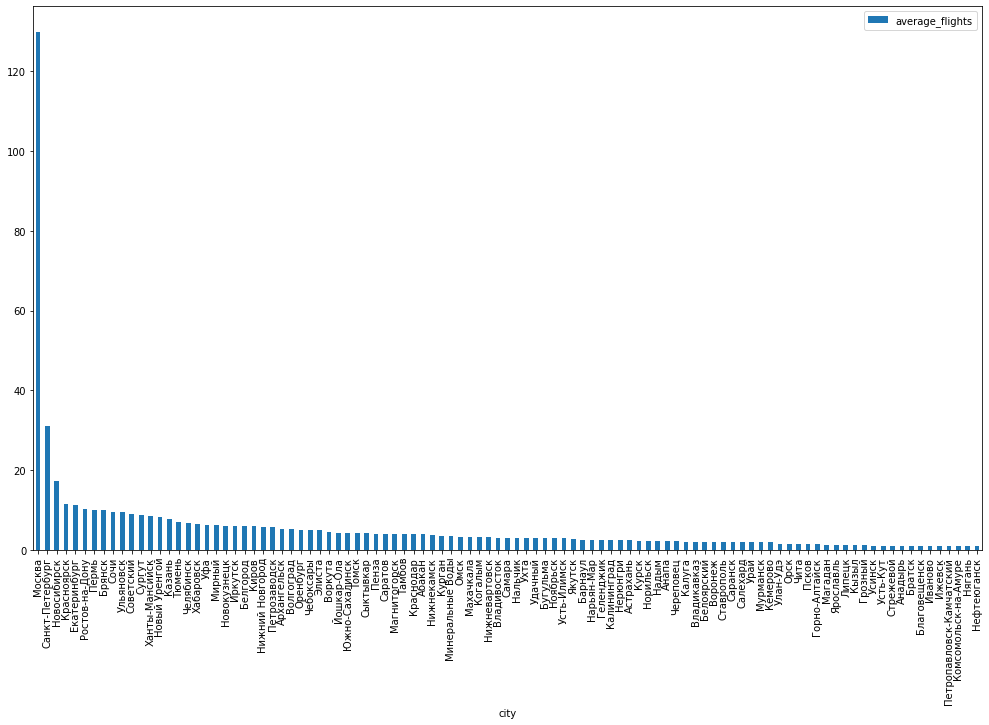

In [12]:
data_flights.sort_values(by = 'average_flights', ascending = False).plot(x = 'city', y = 'average_flights', kind = 'bar', figsize=(17,10))

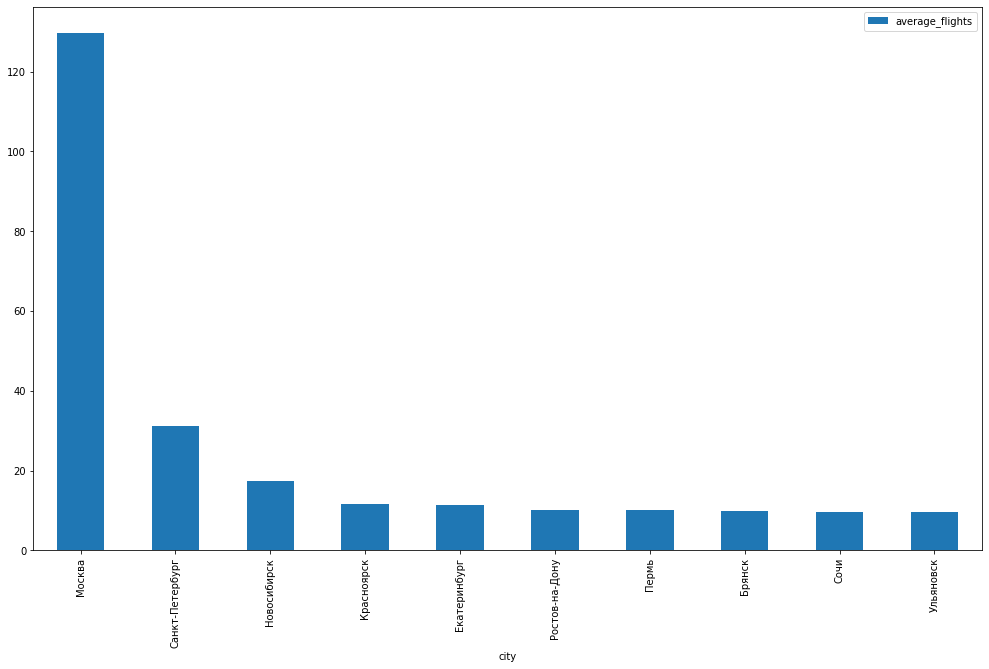

In [13]:
data_flights.sort_values(by = 'average_flights', ascending = False).head(10).plot(x = 'city', y = 'average_flights', kind = 'bar', figsize=(17,10))

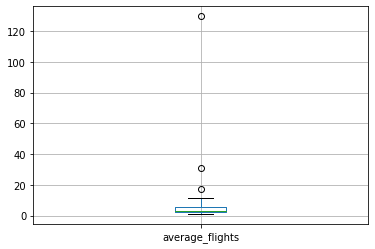

In [14]:
data_flights.boxplot()

### Вывод
- Большинство авиаперелетов совершается в Москву (129.8 рейсов в день). На 2 месте Санкт-Петербург (31.2 рейса).
- В топ-10 городов по среднему количеству рейсов в день входят Новосибирск (17.3 в среднем рейсов за день), Красноярск	(11.6),	Екатеринбург (11.3), Ростов-на-Дону	(10.2), Пермь (10.1), Брянск (10.0), Сочи (9.6), Ульяновск (9,6).
- Среднее колиество рейсов за день в большинстве городов России (исключая топ-10) - не превышает 5.9 рейсов в день. А в половине городов - не более 3 рейсов за сутки.
- Наиболее часто совершают рейсы самолеты моделей Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100. Примерно 75% всех рейсов осуществляются этими моделями.